In [7]:
import PIL
from PIL import Image
import requests
from io import BytesIO
import webcolors
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import cv2


In [8]:
# renommer les images
#changez ça en fonction de vos répertoires
i=1
for f in listdir("./images"):
    if isfile(join("./images", f)) : 
        os.rename(join("./images", f), join("./images",str(i)+".jpg"))
        i+=1


In [9]:
import webcolors
def closest_colour(requested_colour):
    min_colours = {}
    for key, name in webcolors.CSS21_HEX_TO_NAMES.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - requested_colour[0]) ** 2
        gd = (g_c - requested_colour[1]) ** 2
        bd = (b_c - requested_colour[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


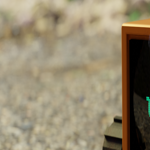

In [10]:
img = Image.open('untitled.png')
img.save('untitled.png',quality= 10)
img = img.resize((300,300))
img.crop((0,0,150,150))


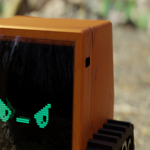

In [11]:
img.crop((150, 0, 300 ,150))


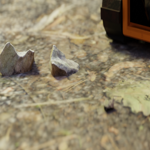

In [12]:
img.crop((0, 150, 150, 300))


In [13]:
def paper_exp(image) : 
    detected_colors = []
    white_parts= 0
    image = image.resize((300, 300))
    top_left = image.crop((0, 0, 150, 150))
    top_right = image.crop((150, 0, 300, 150))
    bottom_left = image.crop((0, 150, 150, 300))
    bottom_right = image.crop((150, 150, 300, 300))
    '''for part in [top_left , top_right , bottom_left , bottom_right]:
        for x in range(part.width) :
            for y in range(part.height) : 
                detected_colors.append(closest_colour(image.getpixel((x, y))))'''
    for part in [top_left, top_right, bottom_left, bottom_right]:
        if ((str(top_colos(part, 1).index[0])) == 'white' and (top_colos(part, 1))[0] > 0.99 ):
            white_parts += 1
    return white_parts         
    


In [14]:
img = cv2.imread('./images/7_.jpg')
def contouring(image): 
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 30, 200)
    contours, hierarchy = cv2.findContours(edged,
                                           cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    return len(contours)


In [15]:
def top_colos(image, n):
    # convert the image to rgb
    image = image.convert('RGB')

    # resize the image to 300 x 300
    image = image.resize((300, 300))

    detected_colors = []
    for x in range(image.width):
        for y in range(image.height):
            detected_colors.append(closest_colour(image.getpixel((x, y))))
    Series_Colors = pd.Series(detected_colors)
    output = Series_Colors.value_counts()/len(Series_Colors)
    return(output.head(n))




In [16]:
'''# read images
img = Image.open('./images/1_.jpeg')
img'''


"# read images\nimg = Image.open('./images/1_.jpeg')\nimg"

In [38]:
list_outputs = []
list_white_parts = []
list_contours = []
list_images = [f for f in listdir("./images") if isfile(join("./images", f))]


In [39]:
#extraction des couleurs
for image in list_images:
    img = Image.open(join('./images/'+image))
    list_white_parts.append(paper_exp(img))
    list_outputs.append(list(top_colos(img, 5).index))
    img = cv2.imread(join('./images/'+image))
    list_contours.append(contouring(img))


In [40]:
dict_images = {}
dict_images.update({"Image": list_images, "color": list_outputs,
                   "white_part": list_white_parts, "contour": list_contours})


In [41]:
len(list_images)

12

In [42]:
df = pd.DataFrame(dict_images )
df.head(80) 

,Image,color,white_part,contour
0,1.jpg,"[white, silver, gray, yellow, teal]",0,510
1,10.jpg,"[silver, gray, black, maroon, olive]",0,136
2,11.jpg,"[white, olive, silver, gray, green]",0,558
3,12.jpg,"[silver, orange, teal, yellow, gray]",0,278
4,2.jpg,"[white, silver, gray, yellow, teal]",0,1374
5,3.jpg,"[white, silver, gray, orange, yellow]",0,1263
6,4.jpg,"[silver, white, black, gray, maroon]",0,33
7,5.jpg,"[white, silver, gray, black, teal]",0,759
8,6.jpg,"[white, gray, silver, maroon, olive]",0,155
9,7.jpg,"[white, silver, gray, olive, yellow]",0,1332


In [65]:
#trouver le contour


import numpy as np

# Let's load a simple image with 3 black squares
image = cv2.imread('./images/12.jpg')
cv2.waitKey(0)

# Grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)
cv2.waitKey(0)

# Finding Contours
# Use a copy of the image e.g. edged.copy()
# since findContours alters the image
contours, hierarchy = cv2.findContours(edged,
                                       cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

cv2.imshow('Canny Edges After Contouring', edged)
cv2.waitKey(0)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# -1 signifies drawing all contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

cv2.imshow('Contours', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Number of Contours found = 278


In [57]:
import cv2
import numpy as np
from skimage import io

img = io.imread('untitled.png')[:, :, :-1]


In [58]:
pixels = np.float32(img.reshape(-1, 3))

n_colors = 5
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 200, .1)
flags = cv2.KMEANS_RANDOM_CENTERS

_, labels, palette = cv2.kmeans(pixels, n_colors, None, criteria, 10, flags)
_, counts = np.unique(labels, return_counts=True)


In [59]:
dominant = palette[np.argmax(counts)]
dominant

array([162.0118  , 149.15257 , 117.202484], dtype=float32)

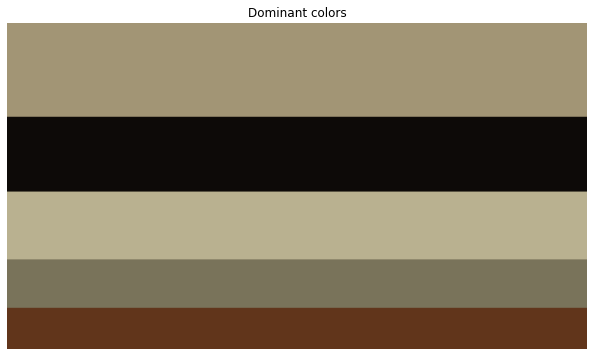

In [64]:
import matplotlib.pyplot as plt


indices = np.argsort(counts)[::-1]
freqs = np.cumsum(np.hstack([[0], counts[indices]/counts.sum()]))
rows = np.int_(img.shape[0]*freqs)

dom_patch = np.zeros(shape=img.shape, dtype=np.uint8)
for i in range(len(rows) - 1):
    dom_patch[rows[i]:rows[i + 1], :, :] += np.uint8(palette[indices[i]])

fig,  ax1 = plt.subplots(1, 1, figsize=(12, 6))

ax1.imshow(dom_patch)
ax1.set_title('Dominant colors')
ax1.axis('off')
plt.show(fig)
